In [1]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt

In [2]:
center1 = np.array([1,1])
center2 = np.array([5,5])
center3 = np.array([8,1])

In [16]:
data1 = np.random.randn(200,2)+center1
data2 = np.random.randn(200,2)+center2
data3 = np.random.randn(200,2)+center3

In [22]:
data = np.concatenate((data1,data2,data3),axis=0) # here axis=0 means data is concatennated to the rows i.e. is one below the other

In [23]:
data.shape

(600, 2)

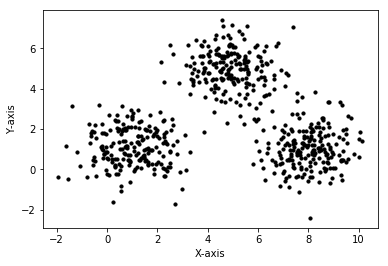

In [28]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.scatter(data[:,0],data[:,1],c="black",s=10)

# Applying K-Means to the above Data

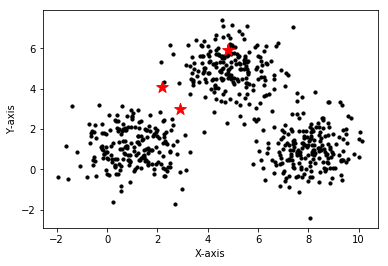

In [40]:
K = 3

r = data.shape[0]
c = data.shape[1]

# Generating random centers
mean = np.mean(data,axis=0)
std = np.std(data,axis=0)
C = np.random.randn(K,c)*std +mean


plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.scatter(data[:,0],data[:,1],c="black",s=10)
plt.scatter(C[:,0],C[:,1],c="red",marker="*",s=150)

In [41]:
C

array([[4.79657193, 5.9255368 ],
       [2.91706799, 2.97656019],
       [2.19638722, 4.06081868]])

## Running the k-Means algorithm manually

In [47]:
df = pd.DataFrame({"C1":data[:,0],"C2":data[:,1]})
Centroid = pd.DataFrame({"C1": C[:,0],"C2":C[:,1]})

In [67]:
diff = 1
j = 0
while diff!=0:
    i=1
    XD = df
    for index1,c_rows in Centroid.iterrows():
        ED =[]
        for index2,d_rows in df.iterrows():
            d1 = (c_rows["C1"] - d_rows["C1"])
            d2 = (c_rows["C2"] - d_rows["C2"])
            dist = np.sqrt(d1**2 +d2 **2)
            ED.append(dist)
        df[i] = ED
        i+=1
    Clus = []

    for index,row in df.iterrows():
        min_dist=(row[1])
        pos=1
        for i in range(K):
            if (row[i+1]) < (min_dist):
                min_dist = (row[i+1])
                pos=i+1
        Clus.append(pos)
    df["Clusters"] = Clus
    new_centroid = df.groupby(["Clusters"]).mean()[["C1","C2"]]
    
    if j ==0:
        diff = 1
        j=j+1
    else:
        diff = (new_centroid["C1"] - Centroid["C1"]).sum() + (new_centroid["C2"] - Centroid["C2"]).sum()
        print(diff.sum())
    Centroid = df.groupby(["Clusters"]).mean()[["C1","C2"]]

-0.5446358915243392
1.4611886333482493
0.05677095458372472
0.012654845647990465
0.004401995152072846
0.0


In [68]:
Centroid

,C1,C2
Clusters,,
1,4.873647,5.023593
2,7.977333,1.057173
3,1.008168,1.087603


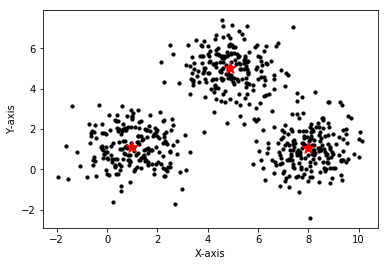

In [69]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.scatter(df["C1"],df["C2"],c="black",s=10)
plt.scatter(Centroid["C1"],Centroid["C2"],c="red",marker="*",s=150)
plt.show()

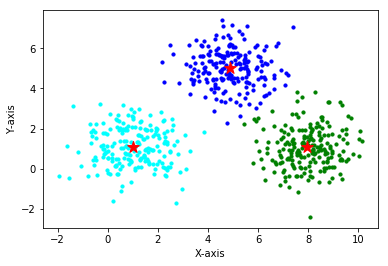

In [74]:
color=['blue','green','cyan']
for k in range(K):
    data=df[df["Clusters"]==k+1]
    plt.scatter(data["C1"],data["C2"],c=color[k],s=10)
plt.scatter(Centroid["C1"],Centroid["C2"],c='red',marker="*",s=150)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()